In [1]:
import numpy as np
from scipy import optimize
import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import pandas as pd

# Omit the first data point (which includes knowledge of N_0)
url = 'https://gist.githubusercontent.com/raquelhr/d1324510056353feeccf111d6b186a0d/raw/7b3bccc7917f3baa7ec1d919195d120083ee75e9/proctatinium_data.csv'
data = pd.read_csv(url, skiprows=[1])

# Cast data as float, to overcome issues with numerical precision
t_values = np.array(data['time'], dtype=float)
count_values = np.array(data['count_rate'], dtype=float)

data.head(3)  # Take a quick look at the data

,time,count_rate
0,5,28
1,10,29
2,15,28


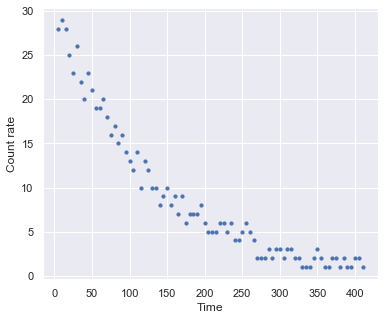

In [2]:
# Plot the data
plt.figure(figsize=(6, 5))
plt.scatter(t_values, count_values, s=10)
plt.xlabel('Time')
plt.ylabel('Count rate')
plt.show()

In [3]:
def fit_decay(t, theta):
    '''
    The function we are trying to fit to the data, described in Eq. (1) of the
    Study Guide. It is an exponential decay function with parameters theta =
    (N₀, λ).

    Inputs:

      t - The time at which we are counting the number of decayed isotopes.
          theta - The parameters of the function.

    Returns: the number of radioactive isotopes that decayed at time t.
    '''
    return theta[0] * np.exp(-theta[1] * t)


def log_likelihood(t_values, count_values, theta):
    '''
    Compute the natural logarithm of the likelihood function for a given set of
    parameters.

    Inputs:

      t_values_raw, count_values - The data set, containing the time values at
          which we counted the decayed isotopes, and the number of isotopes that
          decayed.
      theta - The parameters of our model, namely N₀ and λ of the exponential
          decay function.
    '''
    fit_values = fit_decay(t_values, theta)
    squared_error = np.sum((fit_values - count_values) ** 2)
    return -squared_error / len(t_values)

In [20]:
theta_guess = [1, 1]  # Notice these are completely off-target!

current_log_likelihood = log_likelihood(t_values, count_values, theta_guess)

mcmc_results = []  # Store the proposals for the parameters in a list
n_trials = 1000   # Number of trials, or iterations, to be run
np.random.seed(seed=123)  # Set the seed for reproducibility

for i in range(n_trials):
    # Propose new theta using random noise
    new_theta = theta_guess + sts.norm.rvs(0, 1, size=len(theta_guess))

    # TASK: Compute the new log likelihood using the new theta value.

    new_log_likelihood = log_likelihood(t_values, count_values, new_theta)

    # TASK: Compute the likelihood ratio defined in the MCMC algorithm above.

    r = np.exp(new_log_likelihood-current_log_likelihood)

    # TASK: Use r to decide whether or not to accept the proposed new theta or
    # keep the old theta.
    if np.random.random()<r:
        theta_guess = new_theta
        current_log_likelihood = new_log_likelihood
    mcmc_results.append(theta_guess)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: overflow encountered in square
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in exp
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in multiply
  


In [21]:
mcmc_results = np.array(mcmc_results)
mcmc_results.shape

(1000, 2)

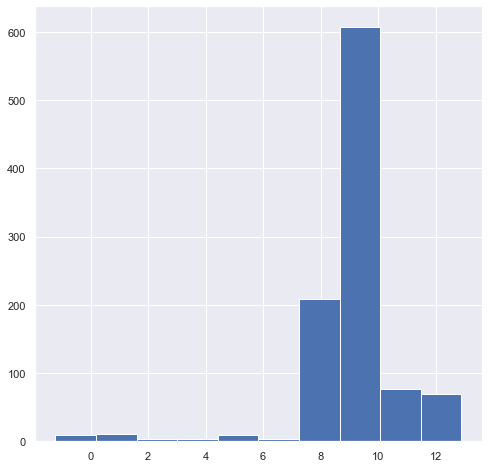

In [22]:
plt.figure(figsize=(8,8))
plt.hist(mcmc_results[:, 0])
plt.show()

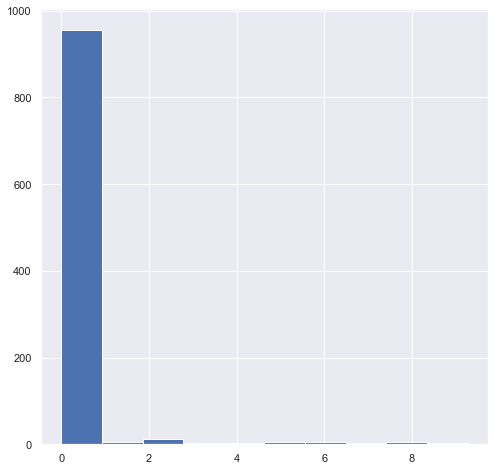

In [23]:
plt.figure(figsize=(8,8))
plt.hist(mcmc_results[:, 1])
plt.show()